In [13]:
# import the necessary packages
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pyimagesearch import datasets
from pyimagesearch import models
import numpy as np
import matplotlib.pyplot as plt 

In [69]:
channel_optir,channel_dc, y = datasets.load_data(data_path='./dataset')

  0%|          | 0/18 [00:00<?, ?it/s]

./dataset\deposition_1\optir
./dataset\deposition_1\DC


  6%|▌         | 1/18 [00:00<00:15,  1.13it/s]

./dataset\deposition_10\optir
./dataset\deposition_10\DC


 11%|█         | 2/18 [00:01<00:14,  1.11it/s]

./dataset\deposition_11\optir
./dataset\deposition_11\DC


 17%|█▋        | 3/18 [00:02<00:10,  1.50it/s]

./dataset\deposition_12\optir
./dataset\deposition_12\DC


 22%|██▏       | 4/18 [00:02<00:10,  1.39it/s]

./dataset\deposition_13\optir
./dataset\deposition_13\DC


 28%|██▊       | 5/18 [00:03<00:09,  1.34it/s]

./dataset\deposition_14\optir
./dataset\deposition_14\DC


 33%|███▎      | 6/18 [00:04<00:09,  1.33it/s]

./dataset\deposition_15\optir
./dataset\deposition_15\DC


 39%|███▉      | 7/18 [00:05<00:08,  1.31it/s]

./dataset\deposition_16\optir
./dataset\deposition_16\DC


 44%|████▍     | 8/18 [00:06<00:07,  1.30it/s]

./dataset\deposition_17\optir
./dataset\deposition_17\DC


 50%|█████     | 9/18 [00:06<00:06,  1.30it/s]

./dataset\deposition_18\optir
./dataset\deposition_18\DC


 56%|█████▌    | 10/18 [00:07<00:06,  1.23it/s]

./dataset\deposition_2\optir
./dataset\deposition_2\DC


 61%|██████    | 11/18 [00:08<00:06,  1.16it/s]

./dataset\deposition_3\optir
./dataset\deposition_3\DC


 67%|██████▋   | 12/18 [00:09<00:05,  1.11it/s]

./dataset\deposition_4\optir
./dataset\deposition_4\DC


 72%|███████▏  | 13/18 [00:10<00:04,  1.18it/s]

./dataset\deposition_5\optir
./dataset\deposition_5\DC


 78%|███████▊  | 14/18 [00:11<00:03,  1.19it/s]

./dataset\deposition_6\optir
./dataset\deposition_6\DC


 83%|████████▎ | 15/18 [00:11<00:02,  1.38it/s]

./dataset\deposition_7\optir
./dataset\deposition_7\DC


 89%|████████▉ | 16/18 [00:12<00:01,  1.33it/s]

./dataset\deposition_8\optir
./dataset\deposition_8\DC


 94%|█████████▍| 17/18 [00:13<00:00,  1.19it/s]

./dataset\deposition_9\optir
./dataset\deposition_9\DC


100%|██████████| 18/18 [00:14<00:00,  1.25it/s]


In [70]:
channel_dc[0].shape

(411, 541)

In [71]:
channel_optir= datasets.apply_mask(channel_optir)
channel_dc = datasets.apply_mask(channel_optir)




In [ ]:
channel_dc = [dc/8 for dc in channel_dc]

In [ ]:
channel_optir = [ir/2000 for ir in channel_optir]

In [73]:
def filter(imagen, greater_than= True, threshold= 4.1):
    filtered_images = []
    for img in imagen:
        if greater_than:
            img[:, np.all(img > threshold, axis = 0)]
        else:
            img[:, np.all(img < threshold, axis = 0)]
        
        filtered_images.append(img)
    return filtered_images

In [78]:
channel_dc[0].shape

(1500, 1500)

In [75]:
channel_optir = filter(channel_optir, greater_than=False, threshold=4)
channel_dc = filter(channel_dc, greater_than=False, threshold=6.2)


Imagen guardada como test.png


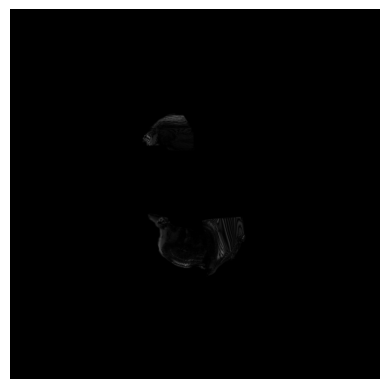

In [79]:
plt.imshow(channel_dc[6],cmap="gray")
plt.axis('off')

print("Imagen guardada como test.png")


In [80]:
X= datasets.preprocessing(channel_optir,channel_dc, height_shape=200, width_shape=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
model = models.create_cnn(200, 200, 2, regress=True)
opt = Adam( learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_squared_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), epochs=300, batch_size=10)


c:\Users\anton\OneDrive\Documentos\machine learning\cnn_regression\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


[INFO] training model...
Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - loss: 533.1870 - val_loss: 316.1162
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 532.9571 - val_loss: 328.4827
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 530.5673 - val_loss: 389.3612
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 532.2474 - val_loss: 423.5019
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 527.6469 - val_loss: 443.3996
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 516.4539 - val_loss: 448.1373
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 520.5604 - val_loss: 449.4930
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 519.6228 - val_loss: 453.7251
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 510.2855 - val_loss: 450.7921
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 506.7874 - val_loss: 448.5557
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 506.8489 - val_loss: 448

In [82]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

[INFO] predicting house prices...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [83]:
percentDiff

array([ -8.34719113,   0.4193306 , -17.04205733,  -6.28971372,
       -27.91896233, -10.95788138, -10.43394262,   6.19817734,
       -13.99906703,  21.70175552, -16.47437414,  -3.29013666,
        14.40711975,  -7.05230419, -10.202876  ,   3.69951075,
        -0.2312851 ,  -6.00586732,  -3.40185165,  -7.17189095,
       -21.96780841,  -3.32816442, -16.55323505,  21.02369308,
       -21.44631658, -17.29165591,  -6.19968414,  -6.24395717,
        -3.51650531])

In [6]:
y


array([20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 22, 24, 26, 20, 22, 24, 26,
       28, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 20,
       22, 24, 26, 28, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 20, 22, 24,
       26, 28, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28,
       20, 22, 24, 26, 20, 22, 24, 26, 28, 20, 22, 24, 26, 28, 20, 22, 24,
       26, 28])